## NBA Players' salary prediction

## 1. Main Objective:

The main objective of this analysis is to **evaluate** different linear regression models applied to predict the NBA players salaries.


## 2. The Dataset

We will be working with a data set based on [NBA2K20 players' salary](https://www.kaggle.com/isaienkov/nba2k20-player-dataset). 

It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset.

It contains the NBA players' salary and features such as `position` and `team` that contribute to the expected salary. 

### 2.1 Import the data using Pandas and examine the shape. 

In [54]:
import pandas as pd
import numpy as np
import os

In [55]:
# Import the data using the file path 
data_path = ['data']
filepath = os.sep.join(data_path + ['nba2k20-full.csv'])
data = pd.read_csv(filepath, sep=',')

print(data.shape)

(429, 14)


Lets now examine what type of data is present

In [56]:
print(data.info())

print('There are two different types ofdata: integers (int64) and strings (object)')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB
None
There are two different types ofdata: integers (int64) and strings (object)


## 3. Data cleaning/feature engineering

There are 14 different features that were described in the previous cell.

The next few cells will performe feature engineering in the data set.

- Let's first check if there's any missing value

In [57]:
data[data.isnull().any(axis=1)]

full_name  rating jersey                team position  \
0             LeBron James      97    #23  Los Angeles Lakers        F   
2    Giannis Antetokounmpo      96    #34     Milwaukee Bucks      F-G   
11            Nikola Jokic      90    #15      Denver Nuggets        C   
16             Rudy Gobert      88    #27           Utah Jazz        C   
20             Luka Doncic      87    #77    Dallas Mavericks      G-F   
..                     ...     ...    ...                 ...      ...   
412        Amile Jefferson      69     #0                 NaN      F-C   
418         Tyrone Wallace      69     #0                 NaN      G-F   
421            Isaac Bonga      68    #17  Washington Wizards        G   
422     Isaiah Hartenstein      68     #0                 NaN      F-C   
427           Jalen Lecque      68     #0        Phoenix Suns        G   

        b_day       height                weight     salary   country  \
0    12/30/84   6-9 / 2.06  250 lbs. / 113.4 kg.  $37436858       USA   
2    12/06/94  6-11 / 2.11  242 lbs. / 109.8 kg.  $25842697    Greece   
11   02/19/95   7-0 / 2.13  253 lbs. / 114.8 kg.  $27504630    Serbia   
16   06/26/92   7-1 / 2.16    238 lbs. / 108 kg.  $25258427    France   
20   02/28/99   6-7 / 2.01    227 lbs. / 103 kg.   $7683360  Slovenia   
..        ...          ...                   ...        ...       ...   
412  05/07/93   6-9 / 2.06  224 lbs. / 101.6 kg.   $1529007       USA   
418  06/10/94   6-5 / 1.96   200 lbs. / 90.7 kg.    $502491       USA   
421  11/08/99   6-8 / 2.03   200 lbs. / 90.7 kg.   $1416852   Germany   
422  05/05/98   7-0 / 2.13  250 lbs. / 113.4 kg.   $1416852   Germany   
427  06/13/00   6-3 / 1.91   190 lbs. / 86.2 kg.    $898310       USA   

     draft_year draft_round draft_peak     college  
0          2003           1          1         NaN  
2          2013           1         15         NaN  
11         2014           2         41         NaN  
16         2013           1         27         NaN  
20         2018           1          3         NaN  
..          ...         ...        ...         ...  
412        2017   Undrafted  Undrafted        Duke  
418        2016           2         60  California  
421        2018           2         39         NaN  
422        2017           2         43         NaN  
427        2019   Undrafted  Undrafted         NaN  

[85 rows x 14 columns]

- Column `team` have NaN values and column `draft_round` containes string values `Undrafted`. To fix that let's fill NaNs and replace string values by int.

- We need to split the data in order to get values from some columns like `weight`, `height` and `salary`. Also, Let's extract date from `b_day` create `age` column.

- We will create a function call `prepare_data` te engineer all these features. 

In [58]:
from datetime import date, datetime

def prepare_data(data: pd.DataFrame):
    '''
        Preprocesses data
    '''
    def calculateAge(birthDate: str):
        '''
        calculates age of person, on given birth day
        '''
        datetime_object = datetime.strptime(birthDate, '%m/%d/%y')
        today = date.today() 
        age = today.year - datetime_object.year -  ((today.month, today.day) < (datetime_object.month, datetime_object.day)) 
        return age 
    
    data['jersey'] = data['jersey'].apply(lambda x: int(x[1:]))
    data['age'] = data['b_day'].apply(calculateAge)
    data['height'] = data['height'].apply(lambda x: float(x.split('/')[1]))
    data['weight'] = data['weight'].apply(lambda x: float(x.split('/')[1].split(' ')[1]))
    data['salary'] = data['salary'].apply(lambda x: float(x[1:]))
    data['draft_round'].replace('Undrafted', 0, inplace = True)
    data['draft_round'] = data['draft_round'].apply(int)
    data['team'] = data['team'].fillna('No team')
    data['college'] = data['college'].fillna('No education')
#     data.drop(['b_day', 'draft_peak'], axis = 1, inplace = True)

Now we can pass the data on the `prepare_data` function and we will have a final cleaner dataset to work with.

In [59]:
prepare_data(data)

In [60]:
#removing imbalanced data
data.loc[data['country'] != 'USA', 'country'] = 'not USA'
data.loc[data['position'] == 'C-F', 'position'] = 'F-C'
data.loc[data['position'] == 'F-G', 'position'] = 'F'
data.loc[data['position'] == 'G-F', 'position'] = 'F'

 - Some columns contain not useful information for model, such as `college`, `full_name`, `jersey` and `draft_peak` and needed to be dropped.

In [61]:
data = data.drop(['college', 'full_name', 'jersey', 'draft_peak', 'b_day'], axis=1)

In [62]:
data.tail(5)

rating                team position  height  weight     salary  country  \
424      68       Atlanta Hawks        G    1.83    81.6   522738.0      USA   
425      68     Houston Rockets        G    1.91    90.7    79568.0      USA   
426      68  Los Angeles Lakers        F    2.08    90.7    79568.0  not USA   
427      68        Phoenix Suns        G    1.91    86.2   898310.0      USA   
428      67          Miami Heat        F    2.01    97.5  1416852.0      USA   

     draft_year  draft_round  age  
424        2018            0   25  
425        2015            2   27  
426        2018            0   23  
427        2019            0   20  
428        2018            0   27

- Lets now check if there's any outliers that can be removed from our dataset.

In [63]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "box"}, {"type": "box"}],
           [{"type": "box"}, {"type": "box"}]],
)

fig.add_trace(go.Box(y=data['age'], boxpoints='all', name='age'),
              row=1, col=1)

fig.add_trace(go.Box(y=data['weight'], boxpoints='all', name='weight'),
              row=1, col=2)

fig.add_trace(go.Box(y=data['height'], boxpoints='all', name='height'),
              row=2, col=1)

fig.add_trace(go.Box(y=data['rating'], boxpoints='all', name='rating'),
              row=2, col=2)
fig.update_layout(height=1000)
fig.show()

Some of data can be assumed as an outlier. We can remove them using percentiles.

In [64]:
for column in ['weight', 'height']:
    upper_lim = data[column].quantile(.95)
    lower_lim = data[column].quantile(.05)
    data.loc[(data[column] > upper_lim),column] = upper_lim
    data.loc[(data[column] < lower_lim),column] = lower_lim
for column in ['age', 'rating']:
    upper_lim = data[column].quantile(.95)
    lower_lim = data[column].quantile(.05)
    data.loc[(data[column] > upper_lim),column] = int(upper_lim)
    data.loc[(data[column] < lower_lim),column] = int(lower_lim)

In [65]:
data.head(5)

rating                  team position  height  weight      salary  country  \
0      87    Los Angeles Lakers        F    2.06   113.4  37436858.0      USA   
1      87  Los Angeles Clippers        F    2.01   102.1  32742000.0      USA   
2      87       Milwaukee Bucks        F    2.11   109.8  25842697.0  not USA   
3      87         Brooklyn Nets        F    2.08   104.3  37199000.0      USA   
4      87       Houston Rockets        G    1.96    99.8  38199000.0      USA   

   draft_year  draft_round  age  
0        2003            1   35  
1        2011            1   29  
2        2013            1   26  
3        2007            1   32  
4        2009            1   31

At this point we are ready to start our Linear Regression analysis to predict the player's salaries.

## 4. Data Modeling and predictions using Linear Regression

In [66]:
# converting categorical data to one-hot encoding

for column in ['team', 'country', 'position', 'draft_round']:
    encoded_columns = pd.get_dummies(data[column])
    data = data.join(encoded_columns).drop(column, axis=1)

In [67]:
X, y = data.drop(['salary'], axis = 1), data['salary']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import preprocessing

In [69]:
# So we can see, that we get 46 feature columns
print(X.shape)
print(y.shape)

(429, 45)
(429,)


In [70]:
#normalizing input features
normalizer = preprocessing.Normalizer().fit(X)
X = normalizer.transform(X)

### 4.1.Testing simple linear regression


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [72]:
#create polynomial features
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [73]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=72018)

**Fit `StandardScaler` on `X_train`**

In [74]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [75]:
lr = LinearRegression()
lr.fit(X_train_s, y_train)

print(lr.coef_) # coefficients now "on the same scale"

[-54849279.23227525  14674607.0486179  -13501975.61589289 ...
   6533591.88528198         0.         -15845279.46696517]


In [76]:
rr = Ridge(alpha=0.01) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)



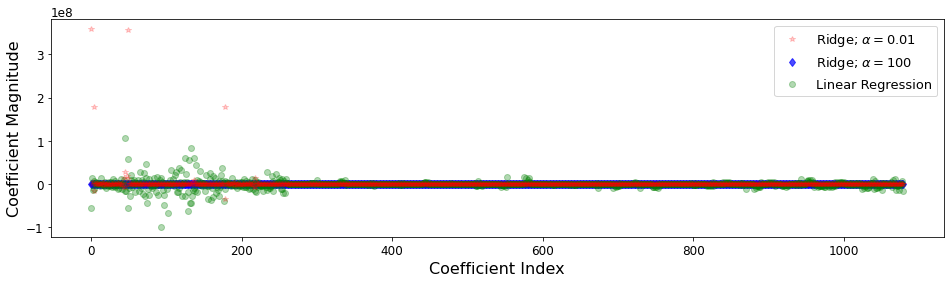

In [79]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (16,4)

plt.plot(rr.coef_,alpha=0.2,linestyle='none',marker='*',markersize=6,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.7,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.3,linestyle='none',marker='o',markersize=6,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=1)
plt.show()

In [80]:
from sklearn.linear_model import Lasso


lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.7489902414244094
test score:  0.624417908729788
number of features used:  68


C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2742890474987788.0, tolerance: 2574363433971.3584



In [45]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.890239295167275
test score for alpha =0.01:  0.33583922961311585
number of features used: for alpha =0.01: 163


C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 581618998692774.0, tolerance: 2574363433971.3584



In [46]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.9944524553804576
test score for alpha =0.0001:  -6.247878191301092
number of features used: for alpha =0.0001: 347


C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 233694404903508.53, tolerance: 2574363433971.3584



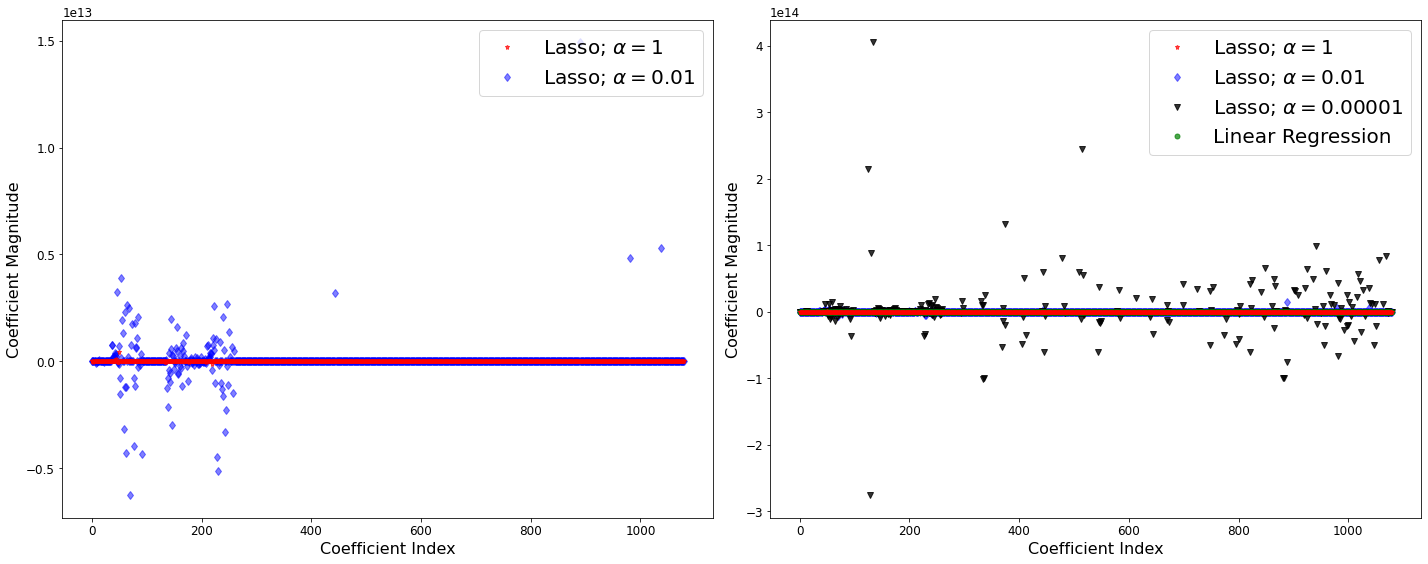

In [52]:
plt.rcParams["figure.figsize"] = (20,8)

plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=20,loc=1)
plt.subplot(1,2,2)

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=20,loc=1)
plt.tight_layout()
plt.show()

In [53]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_
coefficients['ridge regression'] = rr.coef_
coefficients['lasso regression'] = lasso.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe() 

linear regression  ridge regression  lasso regression
count       1.080000e+03      1.080000e+03      1.080000e+03
mean        4.014084e+06      1.230789e+06      8.255282e+08
std         9.546028e+06      1.724569e+07      1.448286e+10
min         0.000000e+00      0.000000e+00      0.000000e+00
25%         0.000000e+00      0.000000e+00      0.000000e+00
50%         2.426878e+05      6.216047e+01      0.000000e+00
75%         4.146345e+06      7.467589e+02      0.000000e+00
max         1.057652e+08      3.581923e+08      4.436140e+11

* To evaluate the models we will use **`rmse`** function that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  

In [81]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [82]:
lr_rmse = rmse(y_test, lr.predict(X_test))

print(lr_rmse)

31804788.100356515


In [87]:
rr_rmse = rmse(y_test, rr.predict(X_test))

print(rr_rmse)

7426057.476651215


In [89]:
lasso_rmse = rmse(y_test, lasso.predict(X_test))

print(lasso_rmse)  # Lasso is slower

5550061.768658243


In [90]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lasso.coef_), 
                                                               len(lasso.coef_.nonzero()[0])))

Of 1080 coefficients, 68 are non-zero with Lasso.


Comparing the RMSE calculation from all models is easiest in a table.

In [91]:
rmse_vals = [lr_rmse, rr_rmse, lasso_rmse]

labels = ['Linear', 'Ridge', 'Lasso']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

RMSE
Linear  3.180479e+07
Ridge   7.426057e+06
Lasso   5.550062e+06

In [ ]:
We can now plot of actual vs predicted player salaries.

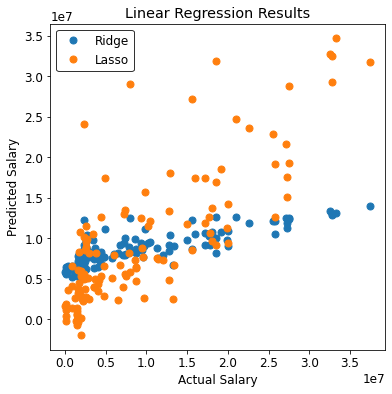

In [98]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso']

models = [rr, lasso]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=7.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Salary', 
       ylabel='Predicted Salary', 
       title='Linear Regression Results');

Let's explore Stochastic gradient descent

In [100]:
# Import SGDRegressor and prepare the parameters
from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lasso_rmse},
    'Ridge': {'penalty': 'l1',
           'alpha': rr_rmse},}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



RMSE  RMSE-SGD-learningrate
Linear  3.180479e+07           1.275380e+07
Ridge   7.426057e+06           1.277166e+07
Lasso   5.550062e+06           1.277372e+07

In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

RMSE  RMSE-SGD-learningrate  RMSE-SGD-scaled
Linear  3.180479e+07           1.275380e+07     6.213122e+06
Ridge   7.426057e+06           1.277166e+07     9.083066e+06
Lasso   5.550062e+06           1.277372e+07     9.113835e+06

Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.

A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.

Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.

Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.